In [62]:
import numpy as np
import pandas as pd

In [63]:
np.set_printoptions(precision=10)

In [64]:
N = 1000
sigma = 1
vector = np.random.normal(loc=0, scale=sigma, size=N)

In [65]:
vector

array([ 2.0649306924e-01, -9.6796263398e-01,  1.0174573811e+00,
        6.1324513761e-01, -1.3207995262e+00,  1.6856482017e+00,
       -1.6564939280e-01, -1.3091653759e+00, -1.5526609760e+00,
       -2.1102739260e-01,  2.1148888842e+00, -9.1894823462e-02,
        2.5115986347e-01,  7.6296193512e-01,  8.0593072043e-01,
       -9.8053983965e-01, -5.7767875132e-01,  3.5235651185e-01,
        3.0196850815e-01,  9.5108539041e-01, -1.1338601247e+00,
        5.2785629190e-02, -2.4982210819e-01, -1.2820169967e+00,
       -7.1842505630e-01,  1.7035190303e+00, -6.3051553443e-01,
        1.2027767864e+00,  1.1369885971e+00, -4.6780623204e-01,
        1.9807493556e-01,  4.1893341724e-01,  1.7222322878e+00,
        1.8659495626e-01, -6.0775177520e-01,  3.1147942316e-03,
        3.0465051899e-01,  2.0723536228e-01, -1.2061233658e-01,
       -1.6925685177e-01,  5.8538130989e-01,  3.4020364262e-01,
       -1.3123231580e+00,  7.5870979005e-01, -1.0131961613e+00,
        4.6883750924e-01, -4.5400741105e

In [66]:
cols = []
for i in range(4):
    cols.append(np.apply_along_axis(lambda x: np.power(x, i), 0, vector))
X = np.transpose(np.vstack(cols))
X

array([[ 1.          ,  0.2064930692,  0.0426393876,  0.008804738 ],
       [ 1.          , -0.967962634 ,  0.9369516608, -0.9069341975],
       [ 1.          ,  1.0174573811,  1.0352195223,  1.053291744 ],
       ...,
       [ 1.          ,  1.726375033 ,  2.9803707545,  5.1452376596],
       [ 1.          , -0.5489456185,  0.3013412921, -0.165419982 ],
       [ 1.          ,  1.2726004989,  1.6195120299,  2.0609918172]])

In [67]:
Y = np.random.normal(loc=0, scale=sigma, size=N)
Y

array([-4.7113328893e-01,  8.6089808944e-01, -6.9692452114e-01,
       -9.3356694466e-01,  1.1584618678e-01, -8.3519394842e-01,
        1.6654336586e-01, -1.1050272093e+00, -1.1280986272e+00,
        9.8818783758e-01, -3.9460316689e-01, -1.5242610635e-01,
       -1.6662388342e+00,  3.3391018494e-01,  4.7488646382e-01,
        1.9107757244e+00, -6.0386492366e-01,  5.4847548748e-01,
        3.3139814336e-01,  3.2890847366e-01,  2.4939767371e-01,
       -4.4340614622e-01, -4.4134069395e-02,  1.4042170726e+00,
       -1.3592189892e-01, -2.2502213706e-01, -7.6650584204e-01,
        5.3841586839e-01, -1.7271508743e-01,  6.2684282812e-01,
        1.6123017578e+00,  6.1977891409e-01,  1.1744058083e+00,
        1.4574632562e+00, -3.0510784411e-01, -1.4216057423e+00,
       -1.3046595525e+00,  9.5416138561e-01,  1.0330746545e+00,
       -9.1824602669e-02, -7.5381189696e-01,  6.0627117126e-01,
       -1.1997635595e+00, -5.2221123832e-01, -2.0891685303e+00,
       -4.5670433691e-01,  3.3318133179e

In [68]:
V = np.linalg.inv(np.matmul(np.transpose(X), X))
beta_hat = np.matmul(np.matmul(V, np.transpose(X)), Y)
beta_hat

array([ 0.0399150617, -0.0209051747, -0.0414239437,  0.0018870539])

In [69]:
V

array([[ 1.4975136293e-03,  1.8277411761e-04, -5.0890166340e-04,
        -7.0776500549e-05],
       [ 1.8277411761e-04,  2.2976020625e-03, -1.9540612042e-04,
        -4.1685600055e-04],
       [-5.0890166340e-04, -1.9540612042e-04,  5.2166991210e-04,
         8.1764881755e-05],
       [-7.0776500549e-05, -4.1685600055e-04,  8.1764881755e-05,
         1.3577029266e-04]])

In [70]:
z_95 = 1.645

def confidence_interval(beta, v, sigma):
    return beta - z_95 * np.sqrt(v) * sigma, beta + z_95 * np.sqrt(v) * sigma


def y_hat(x, beta):
    return np.matmul(np.transpose(x), beta)

In [71]:
p = len(beta_hat)

sigma_hat = (1/(N-p-1)) * sum([(y_hat(X[i], beta_hat) - Y[i])**2 for i in range(N)])

In [72]:
beta_low, beta_high = [], []
for j in range(p):
    low, high = confidence_interval(beta_hat[j], V[j,j], sigma_hat)
    beta_low.append(low)
    beta_high.append(high)

In [73]:
y_hat_low = [y_hat(X[i], beta_low) for i in range(N)]
y_hat_medium = [y_hat(X[i], beta_hat) for i in range(N)]
y_hat_high = [y_hat(X[i], beta_high) for i in range(N)]

In [74]:
pd.DataFrame([np.transpose(X)[1], y_hat_low, y_hat_medium, y_hat_high]).transpose().sort_values(by=0)

,0,1,2,3
391,-3.916037,0.221164,-0.626795,-1.474753
739,-3.653886,0.151483,-0.528801,-1.209086
200,-3.057734,0.049468,-0.337414,-0.724297
903,-2.923310,0.035550,-0.300113,-0.635776
560,-2.645112,0.015289,-0.229539,-0.474368
...,...,...,...,...
543,2.560584,-1.115629,-0.253533,0.608563
432,2.632947,-1.179465,-0.267851,0.643762
749,2.654696,-1.199104,-0.272209,0.654686
120,2.879287,-1.414445,-0.318649,0.777146


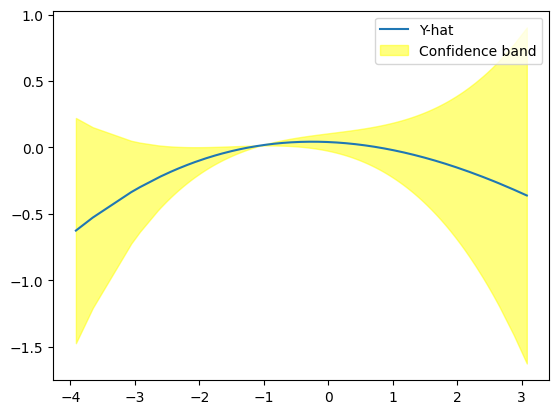

In [75]:
import numpy as np
import matplotlib.pyplot as plt

data = pd.DataFrame([np.transpose(X)[1], y_hat_low, y_hat_medium, y_hat_high]).transpose().sort_values(by=0)

plt.plot(data[0], data[2], label='Y-hat')
plt.fill_between(data[0], data[1], data[3], color='yellow', alpha=0.5, label='Confidence band')

plt.legend()
plt.show()


In [ ]:
chi2_4 = 9.48

